# Digit Recognition

#### Name: Nirmitsinh Nirmalsinh Solanki


## Aim: To recognize digits using neural networks from scratch

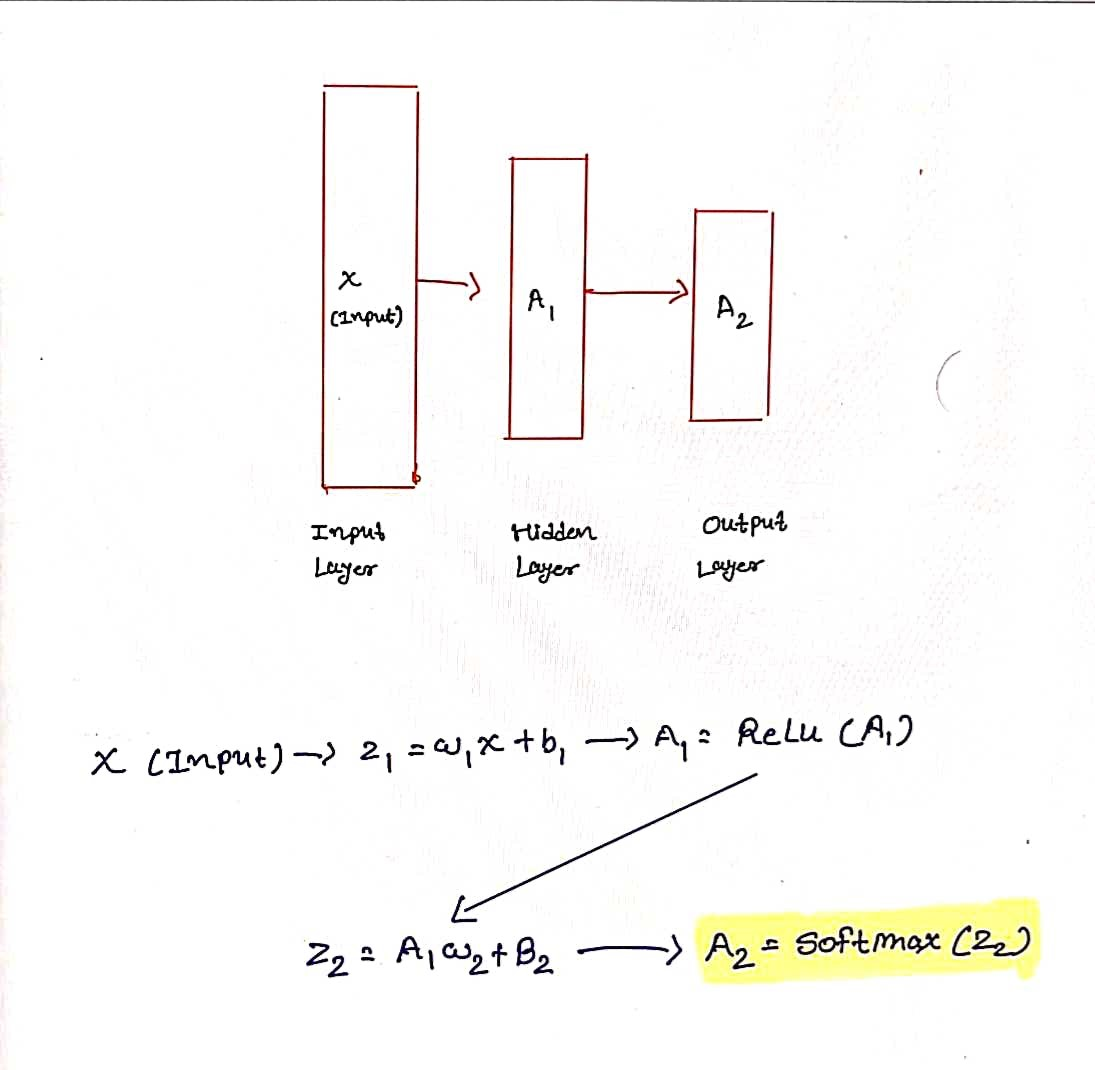

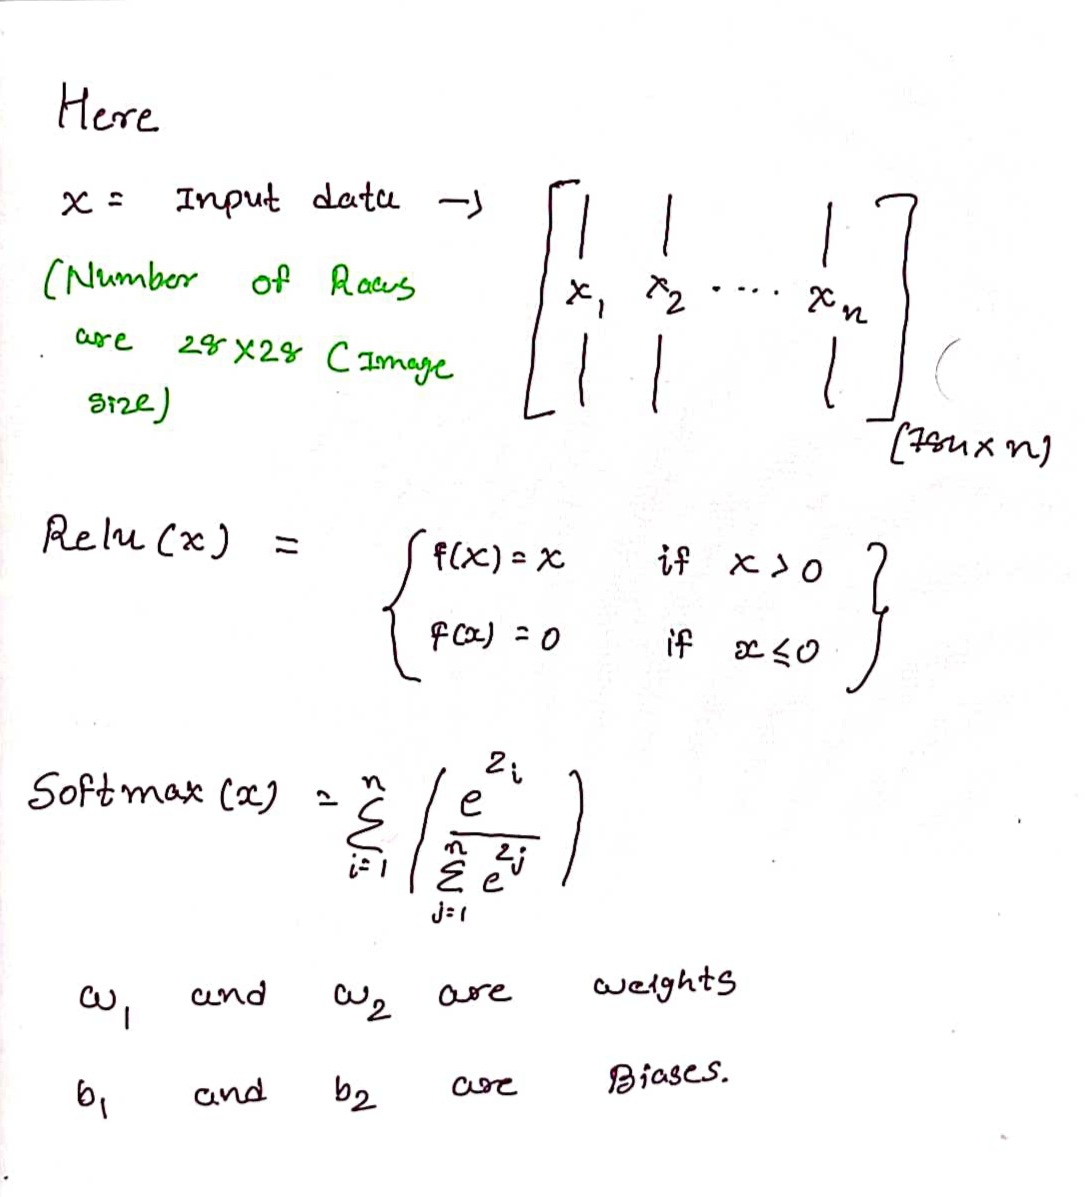

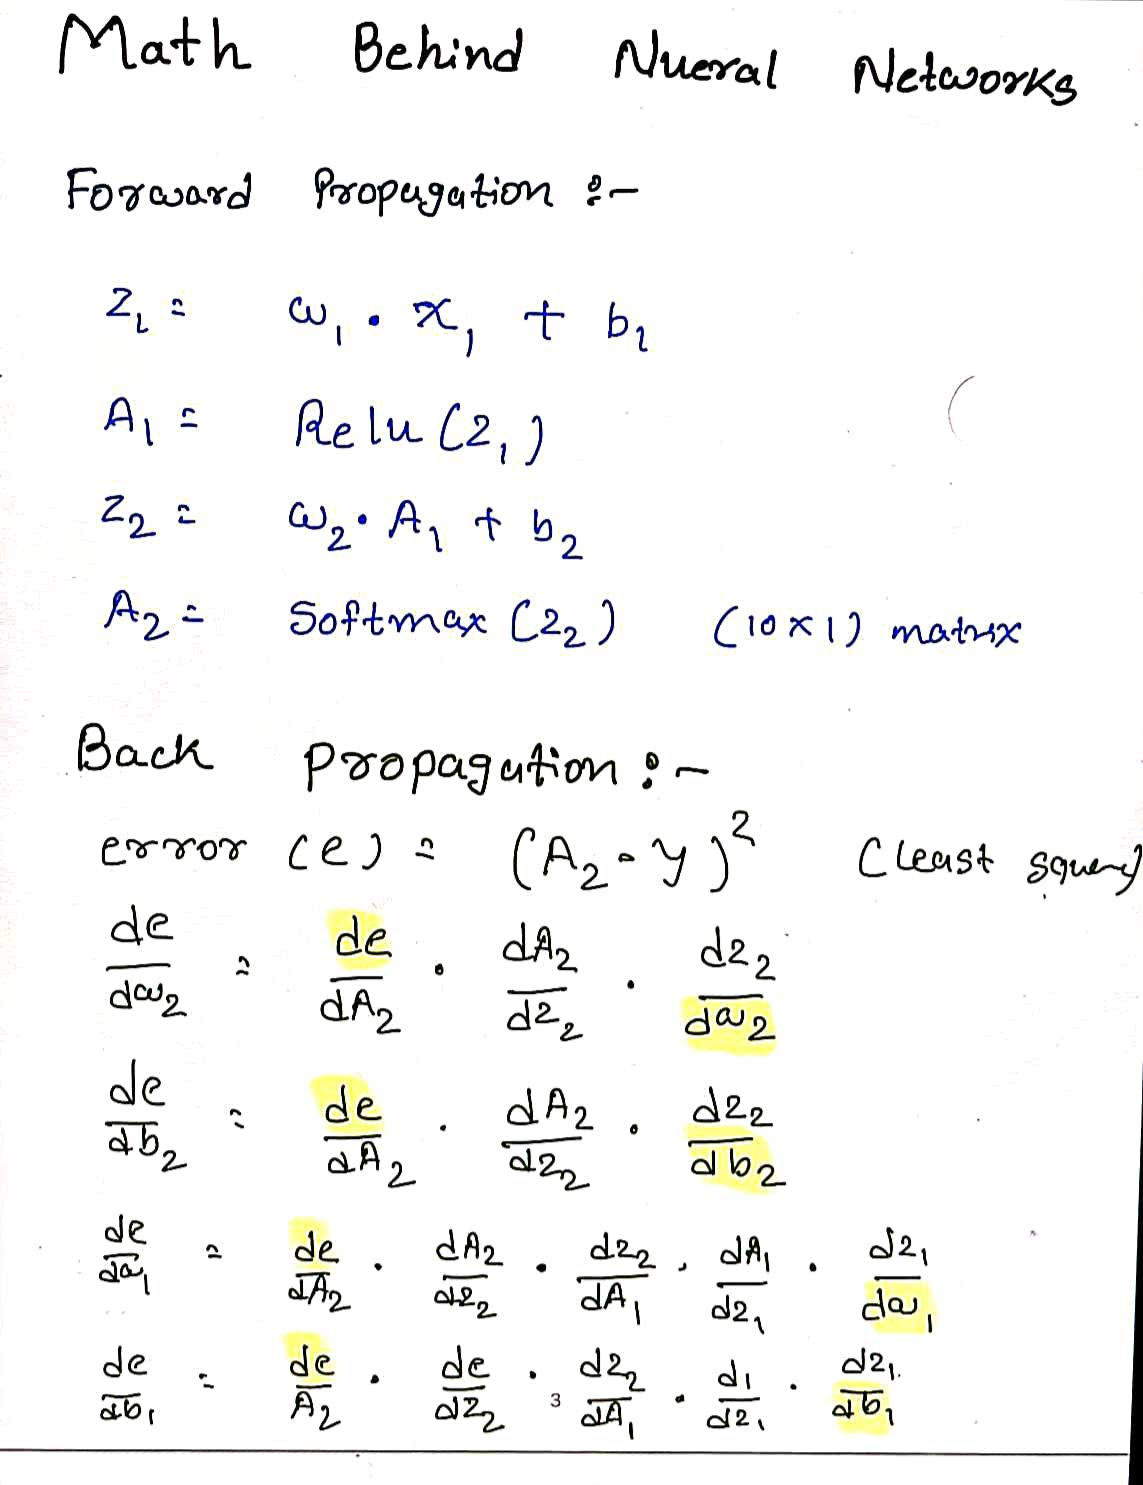

##### Includeing The libraries (NumPy and Pandas)

In [1]:
import numpy as np
import pandas as pd

#### Reading the data from .csv file and converting it into numpy array. also dividing them into training data and testing data.


In [2]:
df = pd.read_csv("D:/Kaggle/train.csv")  #Note: To run the code user must specify the path to the data set in the own device
data = np.array(df)

m, n = data.shape
np.random.shuffle(data)

data_test = data[0:1000].T
x_test = data_test[1:n]/255
y_test = data_test[0]


data_train = data[1000:m].T
x = data_train[1:n]
x = x/255.0
y = data_train[0]



#### Initializing weights and biases randomly in between (-0.5 ) to 0.5 using the init() function.

In [3]:
def init():
    w1 = np.random.rand(10,784)-0.5
    b1 = np.random.rand(10,1) - 0.5

    w2 = np.random.rand(10,10)-0.5
    b2 = np.random.rand(10,1) - 0.5
    return w1,b1,w2,b2

#### Math behind the ReLu and softmax function  is mentioned above in Image.

In [4]:
def relu(z):
    ans = np.maximum(0,z)
    return ans

def softmax(z):
    return (np.exp(z) / sum(np.exp(z)))

In [5]:
def forward(w1,b1,w2,b2,x):
    z1 = np.dot(w1,x) + b1
    a1 = relu(z1)

    z2 = np.dot(w2,a1) + b2
    a2 = softmax(z2)
    
    return z1,a1,z2,a2

#### One hot encoding is a process to convert labels so they can be provided to machine learning algorithms, for instance, one-hot encoding of label 3 in this code would be a 10x1 matrix with all elements of matrix '0' except 4th which would be '1'.

In [6]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

## Back Propagation:

It is possible to directly update the weights and biases of the first layer using gradient descent, however, a slight change in the first layer might give a large change in the final result which might not guarantee to find the optimum weights. Therefore it is important to first change the weights of the layer closer to the output layer and then get near to the first layer. 

In [7]:
def der_relu(z):
    return z>0

def back(Z1, A1, Z2, A2, W1, W2, X, Y):
    
    one_hot_y = one_hot(Y)

    
    dZ2 = 2*(A2 - one_hot_y)
    
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * der_relu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

#### The update function is updating the weight and biases of both layers simultaneously with a given learning rate

In [8]:
def update(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    
    return w1,b1,w2,b2

#### grad() is bringing all the above written functions together and creating the flow of the model which is described in the image at the top for the given Iterations.

In [9]:
def get_pred(a2):
    return np.argmax(a2,0)

def acc(pred,y):
    #print(pred,y)
    return np.sum(pred==y)/y.size

def grad(x,y,inte,alpha):
    w1,b1,w2,b2 = init()
    for i in range(inte):
        
        z1,a1,z2,a2 = forward(w1,b1,w2,b2,x)
        
        dw1,db1,dw2,db2 = back(z1,a1,z2,a2,w1,w2,x,y)
        
        w1,b1,w2,b2 = update(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        
        if i%50 == 0:
            print("interation = ",i)
            print("accuracy = ",acc(get_pred(a2),y))
        
        if i-1==inte:
            print("interation = ",i)
            print("accuracy = ",acc(get_pred(a2),y))
        
    return w1,b1,w2,b2

In [14]:
w_1,b_1,w_2,b_2 = grad(x,y,5000,0.155)

interation =  0
accuracy =  0.07724390243902439
interation =  50
accuracy =  0.7154634146341463
interation =  100
accuracy =  0.7553414634146342
interation =  150
accuracy =  0.8079512195121952
interation =  200
accuracy =  0.8373414634146341
interation =  250
accuracy =  0.8545121951219512
interation =  300
accuracy =  0.8641219512195122
interation =  350
accuracy =  0.8722682926829268
interation =  400
accuracy =  0.8787073170731707
interation =  450
accuracy =  0.8837317073170732
interation =  500
accuracy =  0.8872926829268293
interation =  550
accuracy =  0.8905121951219512
interation =  600
accuracy =  0.8932682926829268
interation =  650
accuracy =  0.895390243902439
interation =  700
accuracy =  0.8977317073170732
interation =  750
accuracy =  0.8997560975609756
interation =  800
accuracy =  0.9020243902439025
interation =  850
accuracy =  0.9033170731707317
interation =  900
accuracy =  0.9050975609756098
interation =  950
accuracy =  0.9061463414634147
interation =  1000
accu

### Using Test Data to check the accuracy of the Model:

In [16]:
z1,a1,z2,a2 = forward(w_1,b_1,w_2,b_2,x_test)
y_pred = get_pred(a2)
count = 0;
l = len(y_test)
for q in range(l):
    if(y_pred[q]==y_test[q]):
        count+=1
true_guess = count
false_guess = len(y_test) - count
print("True Prediction: ",true_guess)
print("Wrong Prediction: ",false_guess)
print("Accuracy in Percent: ",100*true_guess/l)

True Prediction:  931
Wrong Prediction:  69
Accuracy in Percent:  93.1


### Reference:

#### 1) Pro Machine Learning Algorithms Book by V Kishore Ayyadevara
#### 2) Deep Learning Book by Aaron Courville, Ian Goodfellow, and Yoshua Bengio

#### YouTube Channels:
##### 3) StatQuest with Josh Starmer 
##### 4) Coding Lane
##### 5) Sentdex



